In [1]:
from myfunctions import *
import numpy as np
import pandas as pd
import missingno as msno

from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("../data/AmesHousing.csv")

In [3]:
df.shape

(2930, 82)

In [4]:
# Drop variables with +++ Missing Vales
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [5]:
# Feature Eng.
df['Age'] = df['Yr Sold'] - df['Year Built']
df['GarageAge'] = df['Yr Sold'] - df['Garage Yr Blt']
df['TotalSF'] = df['Total Bsmt SF'] + df['Gr Liv Area'] + df['1st Flr SF'] + df['2nd Flr SF']
# Remplacer les valeurs NaN dans la colonne "Total Bsmt SF" par la somme des autres colonnes pour ces lignes
df["TotalSF"] = df["TotalSF"].fillna(df["Gr Liv Area"] + df["1st Flr SF"] + df["2nd Flr SF"])


df['TotalBathrooms'] = df['Full Bath'] + 0.5*df['Half Bath']
df['TotalPorchSF'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']
df['TotalOutdoorSF'] = df['TotalPorchSF'] + df['Wood Deck SF'] + df['Pool Area']



In [6]:
df.shape

(2930, 81)

In [7]:
df = df[(df["Lot Frontage"] <= 300) | (df["Lot Frontage"].isna())]
print(df.shape)

(2928, 81)


In [8]:
# removing Extreme Values
df = df[(df["Lot Frontage"] <= 300) | (df["Lot Frontage"].isna())]
print(df.shape)
df = df[(df["Lot Area"] <= 150000) | (df["Lot Area"].isna())]
print(df.shape)
df = df[(df["1st Flr SF"] <= 4000) |  (df["1st Flr SF"].isna())]
print(df.shape)
df = df[(df["Gr Liv Area"] <= 4500) |  (df["Gr Liv Area"].isna())]
print(df.shape)
df = df[(df["Garage Yr Blt"] <= 2200) | (df["Garage Yr Blt"].isna())]
print(df.shape)
df = df[(df["Enclosed Porch"] <= 1000) | (df["Enclosed Porch"].isna())]
print(df.shape)
df = df[(df["GarageAge"] >= 0) | (df["GarageAge"].isna())]

(2928, 81)
(2925, 81)
(2924, 81)
(2923, 81)
(2922, 81)
(2921, 81)


In [9]:
# Polynomialisation
df['QuadLotArea'] = df['Lot Area']**2
df['QuadAge'] = df['Age']**2
df['TotalSF'] = df['TotalSF']**2

In [10]:
df.shape

(2921, 83)

In [11]:
# On supprimer les colonnes avec une valeur unique
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [12]:
df.shape

(2921, 83)

In [13]:
num_col= df.drop(to_drop,axis=1)

In [14]:
df.shape

(2921, 83)

In [15]:
# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

In [16]:
highly_unbalanced_col = calculate_category_variables(cat_col, threshold_min=96, threshold_max=100)
unbalanced_col = calculate_category_variables(cat_col, threshold_min=85, threshold_max=95)
df = df.drop(highly_unbalanced_col, axis=1)
df = df.drop(unbalanced_col, axis=1)

In [17]:
df.shape

(2921, 66)

In [18]:
df = df.drop(['Year Built', 'Garage Yr Blt' ,'1st Flr SF', 'Garage Area', 'Full Bath', 'Total Bsmt SF', 'Gr Liv Area'], axis=1)

In [19]:
df.shape

(2921, 59)

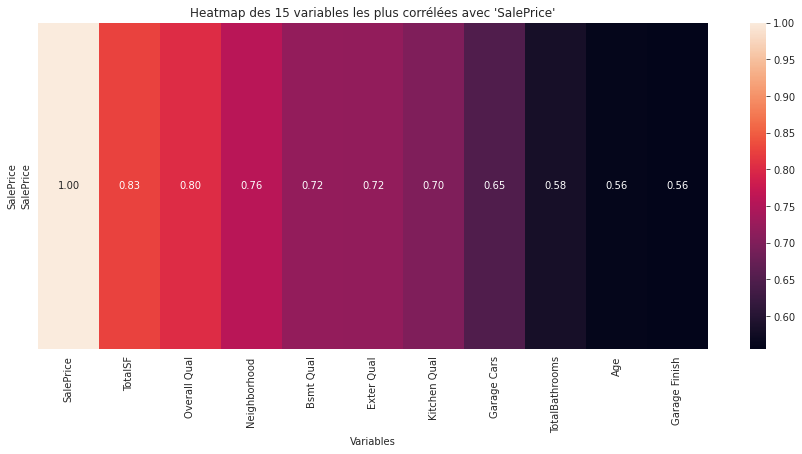

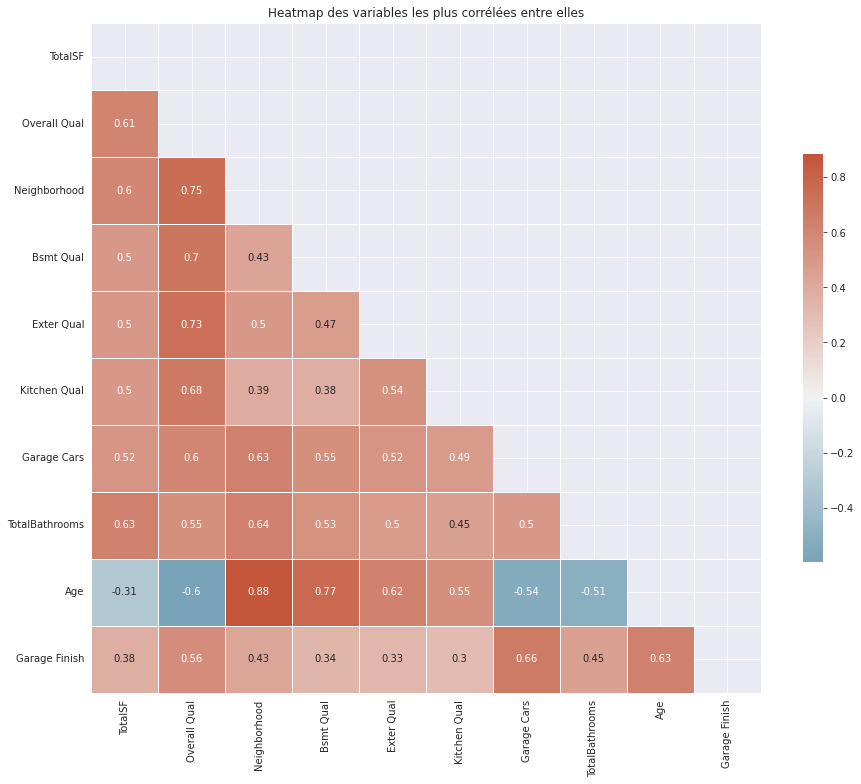

top_correlated_variables_list : 
TotalSF
Overall Qual
Neighborhood
Bsmt Qual
Exter Qual
Kitchen Qual
Garage Cars
TotalBathrooms
Age
Garage Finish


In [20]:
df_sub_selection = plot_corr_heatmaps(df, top = 11)
print(f"top_correlated_variables_list : ")
for i in df_sub_selection:
    print(i)

df_sub_selection = df.loc[:, df_sub_selection]

In [21]:
df_sub_selection.shape

(2921, 10)

#### remove variable with strong collinearity 

In [22]:
# df = df.drop(['Year Built', 'Garage Area' ,'1st Flr SF'], axis=1)

In [23]:
len(df_sub_selection.columns)

10

In [24]:
df_sub_selection.shape

(2921, 10)

In [25]:
new_list = list(df_sub_selection.columns)
new_list.append('SalePrice')
new_list

['TotalSF',
 'Overall Qual',
 'Neighborhood',
 'Bsmt Qual',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Cars',
 'TotalBathrooms',
 'Age',
 'Garage Finish',
 'SalePrice']

In [26]:
df_sub_selection = df[new_list]

In [27]:
df_sub_selection.isna().sum()

TotalSF             0
Overall Qual        0
Neighborhood        0
Bsmt Qual          80
Exter Qual          0
Kitchen Qual        0
Garage Cars         1
TotalBathrooms      0
Age                 0
Garage Finish     159
SalePrice           0
dtype: int64

In [28]:
# df_sub_selection["Bsmt Qual"].value_counts()

In [29]:
# df_sub_selection["Bsmt Qual"].fillna("TA", inplace=True)

In [30]:
# df_sub_selection.isna().sum().sort_values(ascending=False)

In [31]:
df.shape

(2921, 59)

In [32]:
df_sub_selection.to_csv('../data/new_AmesHousing.csv', index=False)